<a href="https://colab.research.google.com/github/Andrea-Cristini/sailgp/blob/main/SailGP_tack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6291 non-null   int64  
 1   BOAT                    6291 non-null   object 
 2   type                    6291 non-null   object 
 3   WING_CONFIG_unk         6291 non-null   float64
 4   DATETIME                6291 non-null   object 
 5   entry_bsp               6291 non-null   float64
 6   exit_bsp                6291 non-null   float64
 7   min_bsp                 6291 non-null   float64
 8   bsp_loss                6291 non-null   float64
 9   entry_twa               6291 non-null   float64
 10  exit_twa                6291 non-null   float64
 11  entry_rh                6288 non-null   float64
 12  exit_rh                 6291 non-null   float64
 13  entry_rh_stability      6276 non-null   float64
 14  max_yaw_rate            6291 non-null   

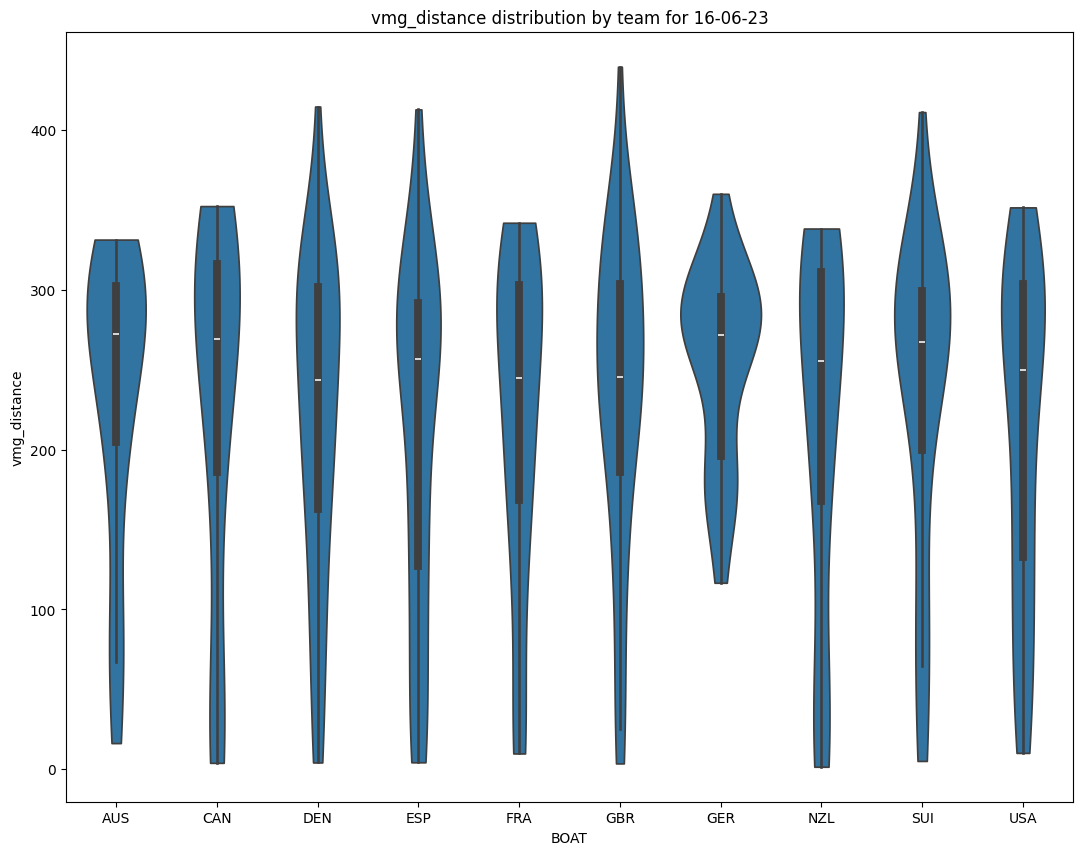

violin
Index(['Unnamed: 0', 'BOAT', 'type', 'WING_CONFIG_unk', 'DATETIME',
       'entry_bsp', 'exit_bsp', 'min_bsp', 'bsp_loss', 'entry_twa', 'exit_twa',
       'entry_rh', 'exit_rh', 'entry_rh_stability', 'max_yaw_rate',
       'two_DB_time', 'tws', 'pop_time', 'turn_min_rh', 't_invert',
       'entry_heel', 'entry_pitch', 'exit_heel', 'exit_pitch', 'turning_time',
       'bsp_at_drop', 'heel_at_drop', 'entry_jib_lead', 'exit_jib_lead',
       'entry_jib_sheet', 'exit_jib_sheet', 'max_rudder_angle', 'vmg_distance',
       'theoretical_target_vmg', 'DATE', 'HOUR'],
      dtype='object')


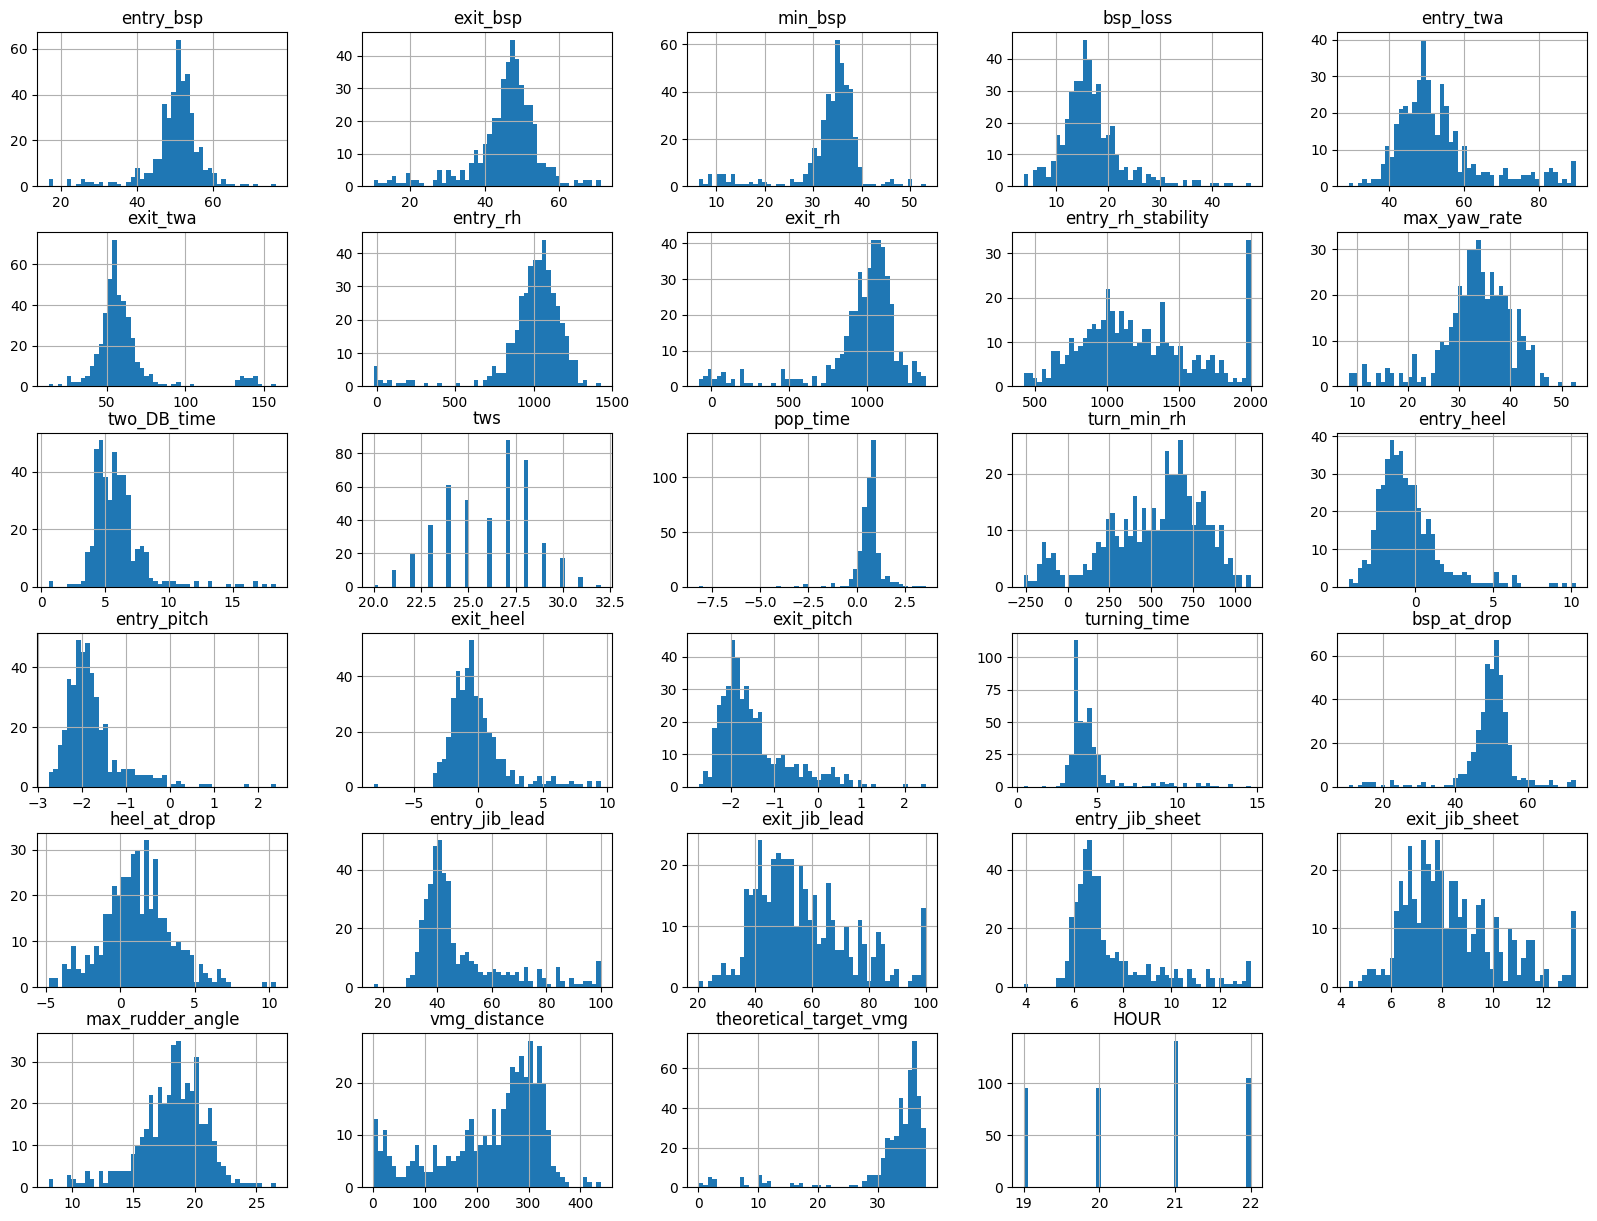

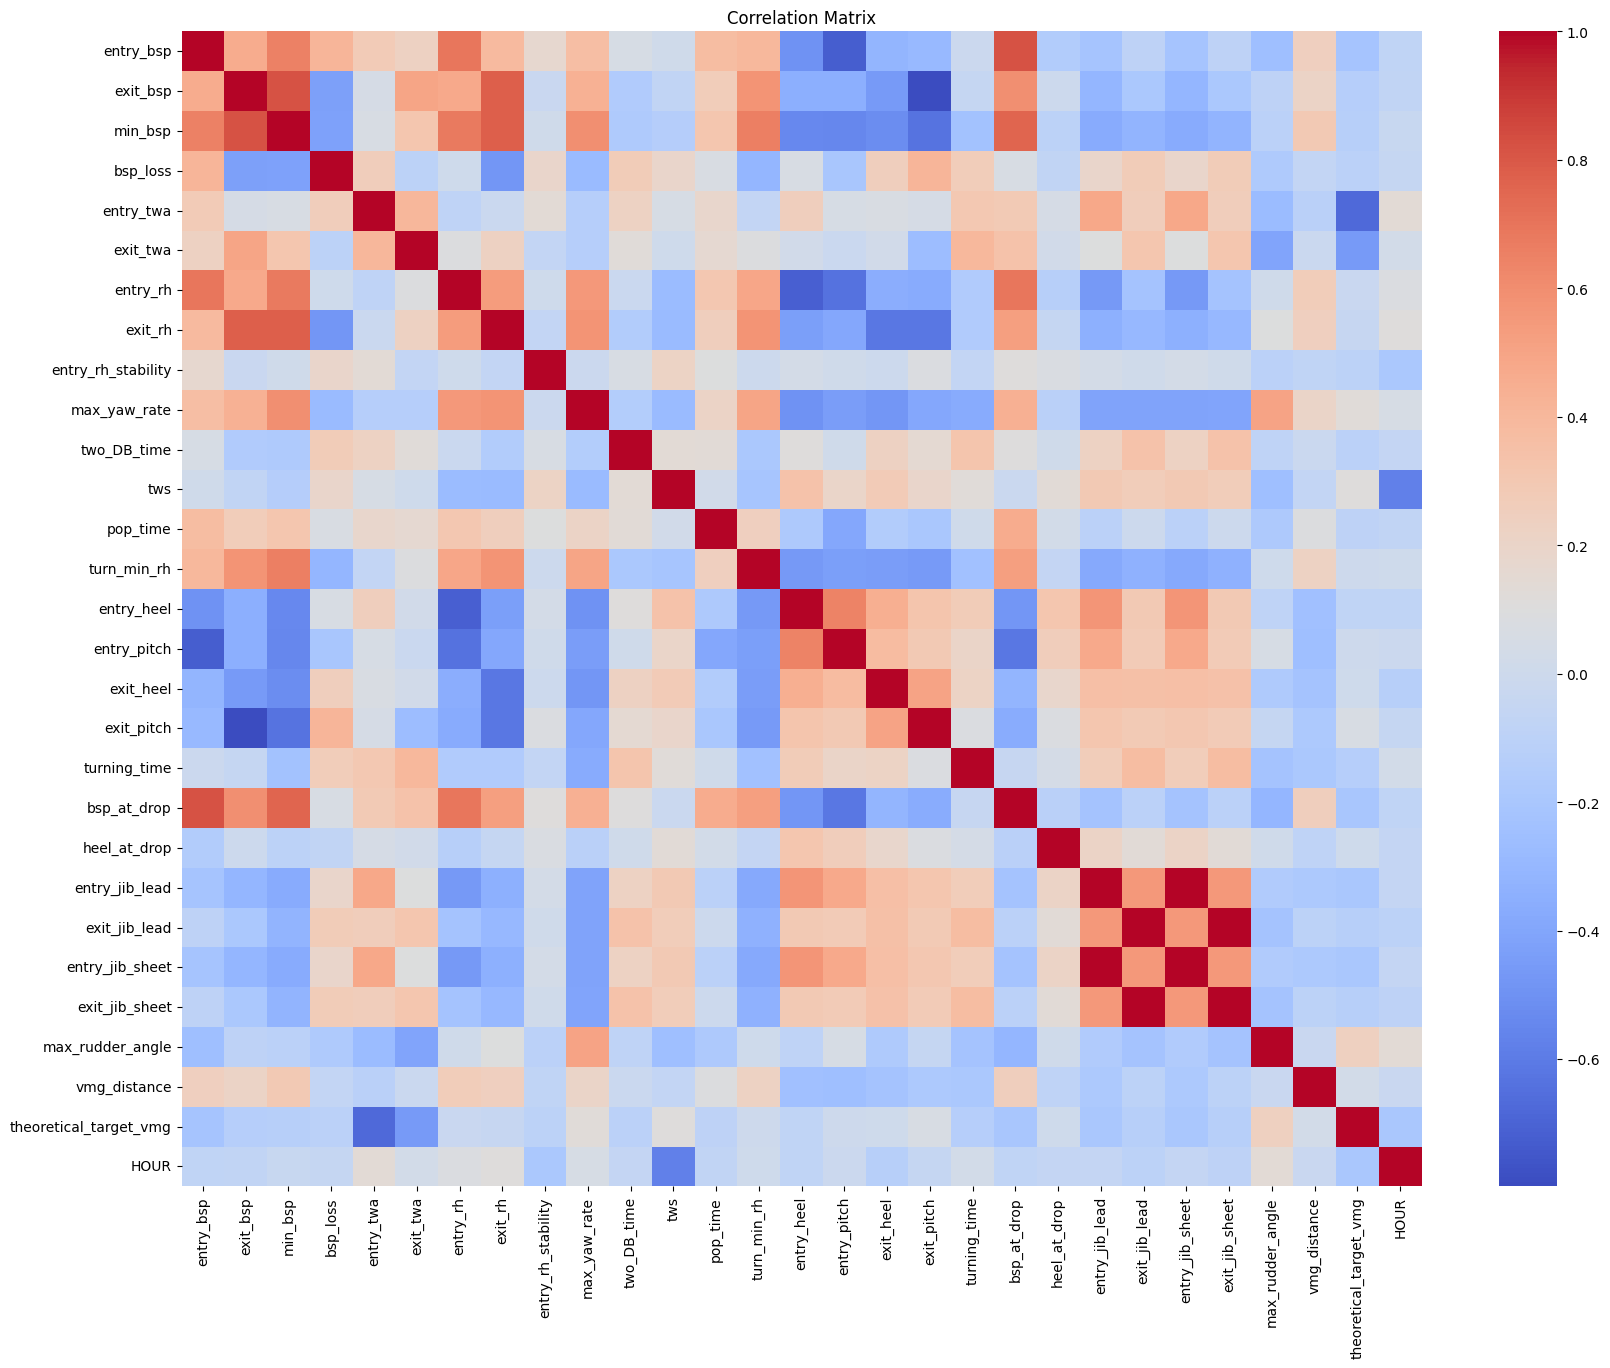

0       0.000581
1       0.000596
2       0.000563
3       0.000512
4       0.000622
5       0.000377
6       0.000486
7       0.000444
8       0.000519
9       0.000540
10      0.000551
11      0.000531
12      0.000660
13      0.000628
14      0.000655
15      0.000431
16      0.000336
17      0.000242
18      0.000575
19      0.000382
20      0.000575
21      0.000775
22      0.000656
23      0.000451
24      0.000443
25      0.000383
26      0.000407
27      0.000542
28      0.000660
29      0.000833
30      0.000444
31      0.000587
32      0.000585
33      0.000666
34      0.000517
35      0.000276
36      0.000466
37      0.000332
38      0.000606
39      0.000541
40      0.000641
41      0.000608
42      0.000621
43      0.000669
44      0.000676
45      0.000537
46      0.000643
47      0.000606
48      0.000650
49      0.000690
          ...   
6241    0.000594
6242    0.000483
6243    0.000231
6244    0.000516
6245    0.000320
6246    0.000503
6247    0.000534
6248    0.0007

<Figure size 2000x1500 with 0 Axes>

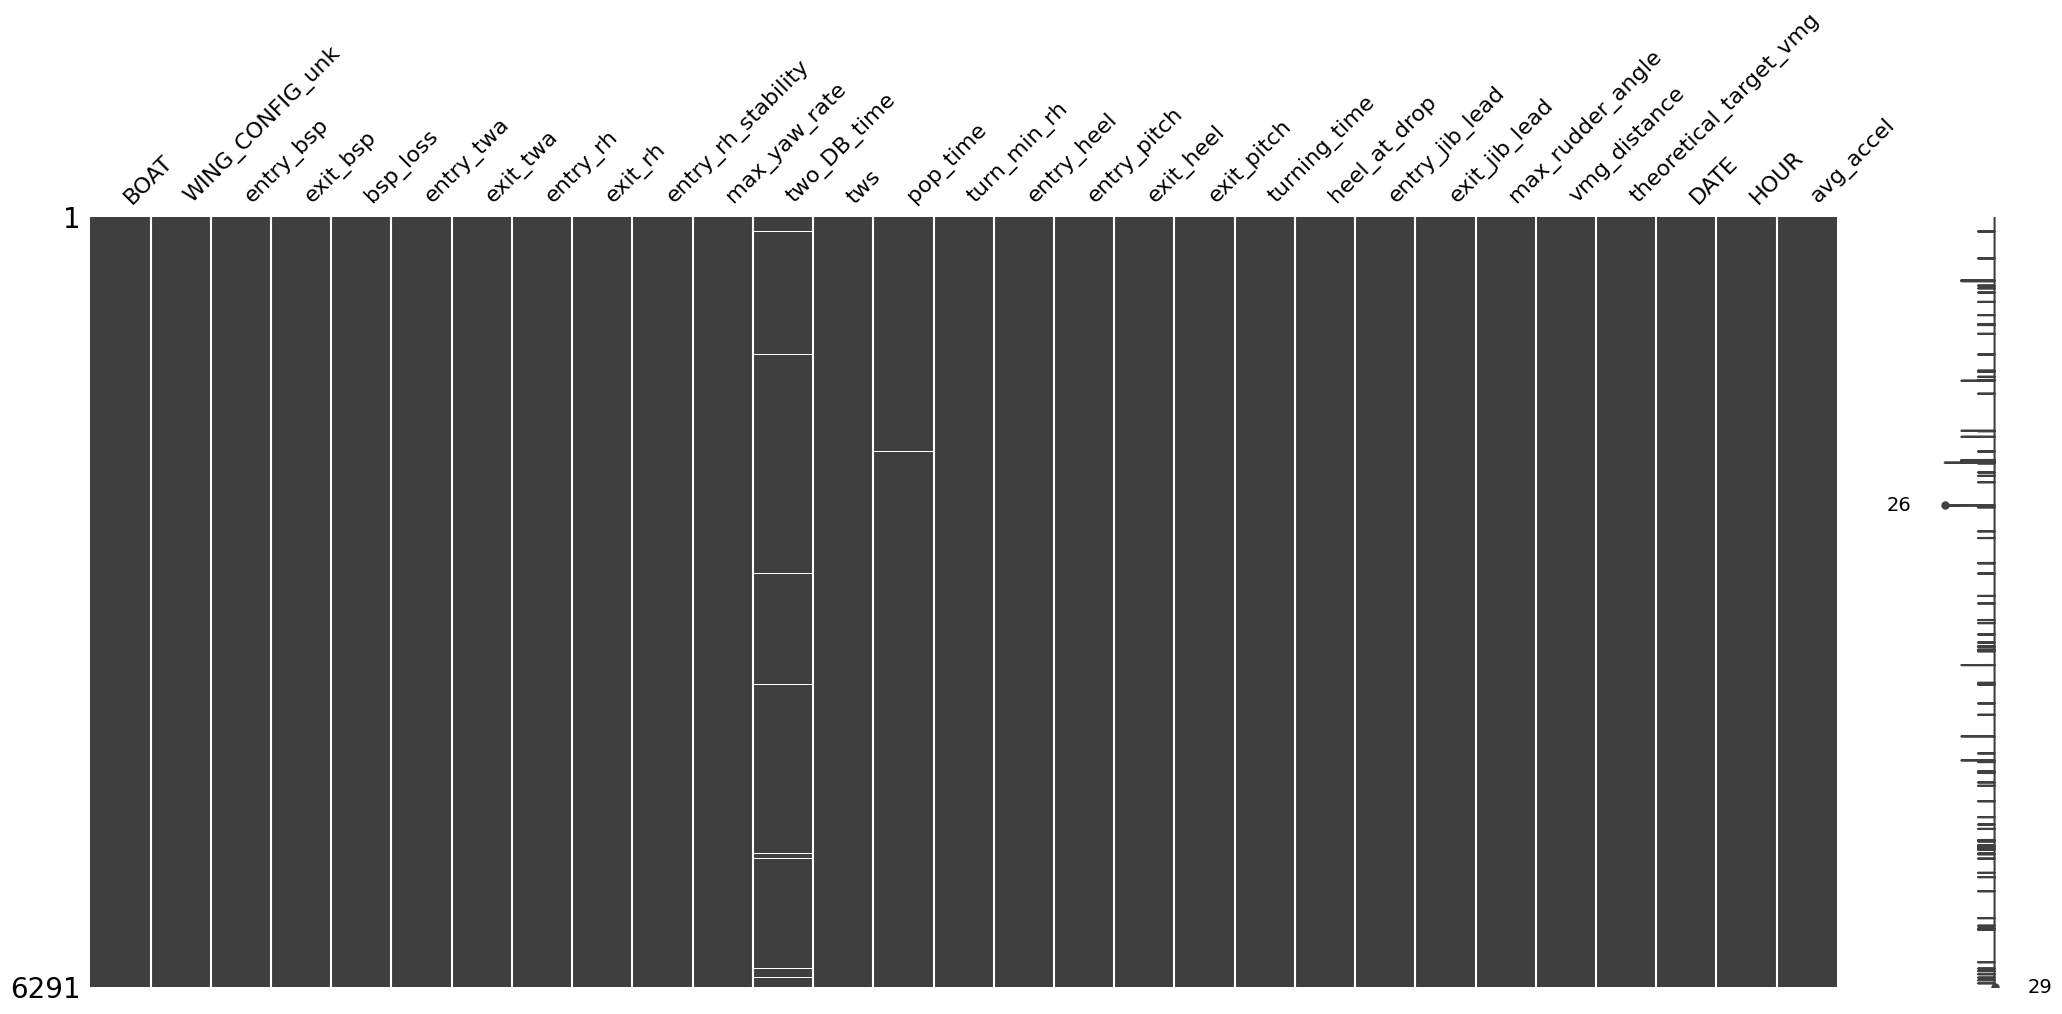

entry_rh              1022.05
entry_rh_stability     961.25
two_DB_time              5.40
pop_time                 1.00
turn_min_rh            442.95
dtype: float64
entry_rh              1022.05
entry_rh_stability     961.25
two_DB_time              5.40
pop_time                 1.00
turn_min_rh            442.95
dtype: float64
BOAT                      0
WING_CONFIG_unk           0
entry_bsp                 0
exit_bsp                  0
bsp_loss                  0
entry_twa                 0
exit_twa                  0
entry_rh                  0
exit_rh                   0
entry_rh_stability        0
max_yaw_rate              0
two_DB_time               0
tws                       0
pop_time                  0
turn_min_rh               0
entry_heel                0
entry_pitch               0
exit_heel                 0
exit_pitch                0
turning_time              0
heel_at_drop              0
entry_jib_lead            0
exit_jib_lead             0
max_rudder_angle          

SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
""" SailGP tack analysis project.
    -----------------------------
    Notebook which imports the dataset, performs
    some EDA, generates some features, builds some
    candidate models, evaluates model accuracy etc
    and interprets the model results """

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#import shap
import sys

mrow = 100
t_tack = 7.5 # tack time to min bsp in seconds i.e. time between entry bsp and min bsp
pd.options.display.min_rows = 0
pd.options.display.max_rows = mrow
pd.options.display.max_columns = mrow

# 2. Load the Dataset
df = pd.read_csv('tack_analysis.csv')

# 3. Exploratory Data Analysis (EDA)

# 3.1 Basic Information
print(df.info())
print(df.describe())

df['DATE'] = pd.to_datetime(df['DATETIME'], format='mixed').dt.date
df['HOUR'] = pd.to_datetime(df['DATETIME'], format='mixed').dt.hour
# NOTE: looks like DATETIME might be a universal time and not local time,
#       so splitting out the hours may be of little use

for cat in ('BOAT','type','DATE'):
  print(df[cat].value_counts())

print(df['DATE'])
print(df['HOUR'])

sample_date = pd.to_datetime('2023-06-16').date()
df_samp = df[df['DATE']==sample_date]
print(df_samp['BOAT'].value_counts())
print(df_samp['vmg_distance'].nsmallest(10))

# 3.2 Missing Values
missing_values = df.isnull().sum()
print(missing_values)
#TODO: remove rows with minimal number of missing values,
#      maybe impute jib_sheet

#df_red = df[['BOAT','vmg_distance']]
# 3.3 Target Variable Distribution
fig = plt.figure(figsize=(13.,10.))
sns.violinplot(x='BOAT', y='vmg_distance',data=df_samp, cut=0)
plt.title('vmg_distance distribution by team for 16-06-23')
plt.show()

# distributions are non-normal - need to account for outliers
print("violin")

# 3.4 Feature Distributions
print(df_samp.columns)
df_samp_num = df_samp.drop(columns=(['Unnamed: 0','BOAT','type',
    'WING_CONFIG_unk','DATETIME','DATE','t_invert']))
df_samp_num.hist(bins=50, figsize=(20, 15))
plt.show()

# 3.5 Correlation Matrix
fig = plt.figure(figsize=(20.,15.))
corr_matrix = df_samp_num.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4.1 Feature Engineering
# feature ideas:
# 1) deceleration = (bsp_loss)/(15/3600)
#   if turning_time = time between entry and exit then use
#   half of this instead for the time
# 2) time between tacks = datetime[n+1] - (datetime[n] + turning_time)

decel = df['bsp_loss']/(t_tack*3600)
accel = (df['exit_bsp'] - df['min_bsp'])/(t_tack*3600)
df['avg_accel'] = (decel + accel)/2
print(df['avg_accel'])

#NOTE: exit boatspeed and min boatspeed are highly correlated,
#      also the boatspeed at drop is highly correlated with the
#      entry boatspeed. At least one of these four variables could
#      be removed, suggest removal of min boatspeed as
#      loss = entry - min, and loss is a relative measure. Also
#      suggest removal of bsp_at_drop in place of entry_bsp.

#NOTE: entry_jib_lead/entry_jib_sheet and exit_jib_lead/exit_jib_sheet
#      are highly correlated. As the data quality of the jib_sheet
#      variables are poor, suggest removal of these variables in place
#      of their lead analogues

df_clean = df.drop(columns=(['Unnamed: 0','type','DATETIME','t_invert',
            'bsp_at_drop','min_bsp','entry_jib_sheet','exit_jib_sheet']))
print(df_clean.columns)

# 4.2 Handling Missing Values
# Fill missing values or drop missing data
#df['column'] = df['column'].fillna(df['column'].mean())

missing_values = df_clean.isnull()
#df_imp = df_clean[missing_values==True]
#print(df_imp.columns)
#print(df_clean[missing_values.any(axis=1)])
print(missing_values.sum())
cols_miss = df_clean.columns[missing_values.sum() > 0]
print(cols_miss)

fig = plt.figure(figsize=(20, 15))
#sns.heatmap(missing_values.corr(), annot=True, cmap='coolwarm')
msno.matrix(df_clean)
plt.show()

#TODO: impute missing values with their median values as all
#      distributions with missing values are non-normal

meds = df_clean[cols_miss].median()
print(meds)

df_clean[cols_miss] = df_clean[cols_miss].fillna(meds)

meds = df_clean[cols_miss].median()
print(meds)

missing_values = df_clean.isnull()
print(missing_values.sum())

print(df_clean.info())

# 4.3 Encoding Categorical Variables
# encode categories and dates (HOUR does not need encoding as it is ordinal)
df_clean['WING_CONFIG_unk'] = df_clean['WING_CONFIG_unk'].astype('object')
cat_feats = df_clean.select_dtypes(include=['object']).columns
for col in cat_feats:
    col_cat = df_clean[col].astype('category').cat
    df_clean[col] = col_cat.codes
    print('\n'+col+' encodings = ',dict(enumerate(col_cat.categories)))

#print(enumerate(df_clean.cat.categories))

#print(df_clean)


# 5. Model Building

# 5.0 Train-test split
X = df_clean.drop('vmg_distance', axis=1)
y = df_clean['vmg_distance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.1 Feature Scaling
# I prefer RobustScalar as it standardises using the median, whereas
#  other scalars use the mean or min/max which are susceptible to outliers

# NOTE: important to standardise after splitting train and test sets,
#  else the test set distribution will leak into the training data
scaler = RobustScaler()

Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_feats = Xy_train.select_dtypes(include=['int32', 'float64']).columns
Xy_train[Xy_feats] = scaler.fit_transform(Xy_train[Xy_feats])
X_train = Xy_train.drop('vmg_distance', axis=1)
y_train = Xy_train['vmg_distance']
print(X_train)
print(y_train)
sys.exit()

# 5.2 Define the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5.3 Train the Model
model.fit(X_train, y_train)

# 6. Model Evaluation

# 6.1 Predictions
y_pred = model.predict(X_test)

# 6.2 Classification Report
print(classification_report(y_test, y_pred))

# 6.3 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Model Interpretation

# 7.1 Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

# 7.2 SHAP Values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 7.3 SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# 7.4 SHAP Dependence Plot
shap.dependence_plot('feature_name', shap_values[1], X_test)

# 8. Conclusion and Next Steps
# Summarize findings, potential improvements, and next steps for further analysis
